In [8]:

import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
def model_2BP(t,state):
    ME = 5.98E+24
    G  = 6.67E-11 
    mu = ME*G*1E-9  # Earth's gravitational parameter = M*G  
                          # [km^3/s^2]
    x = state[0]
    y = state[1]
    z = state[2]
    r= np.sqrt(state[0]**2 + state[1]**2 + state[2]**2)
    
    x_dot = state[3]
    y_dot = state[4]
    z_dot = state[5]
    
    x_ddot = (-mu)/(r**3)*x
    y_ddot = (-mu)/(r**3)*y
    z_ddot = (-mu)/(r**3)*z
    
    dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]
    return dstate_dt




In [10]:
# Initial Conditions / ISS
X_0 = -2775.03475
Y_0 = 4524.24941
Z_0 = 4207.43331
VX_0 = -3.641793088
VY_0 = -5.665088604
VZ_0 =  3.679500667
t0 = 0 #s
tf = 21600 #s
n = 200
t = np.linspace(t0,tf,n)
state_0 = [X_0,Y_0,Z_0,VX_0,VY_0,VZ_0]



In [11]:
 test = integrate.solve_ivp(model_2BP,(t0,tf),state_0,method='DOP853', t_eval=t)

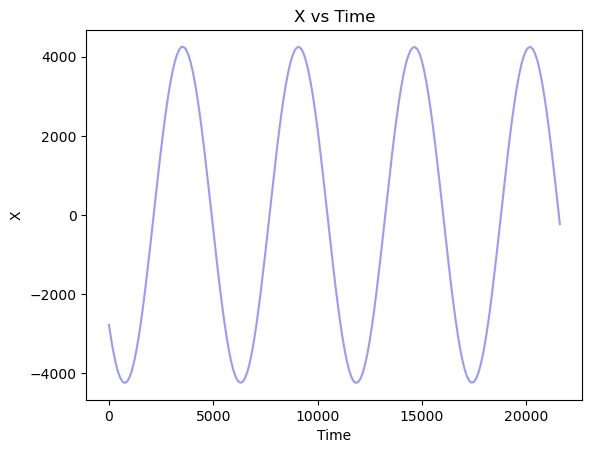

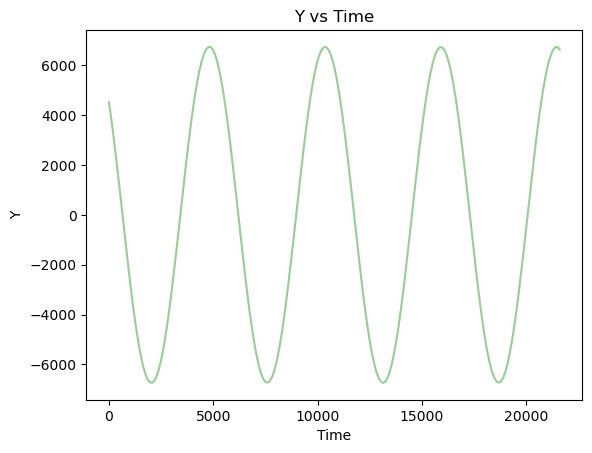

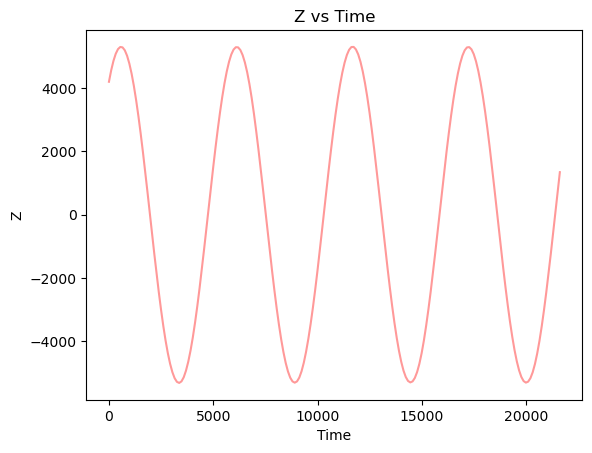

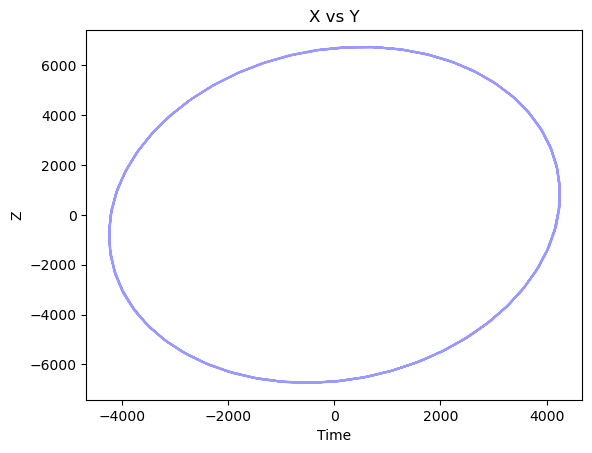

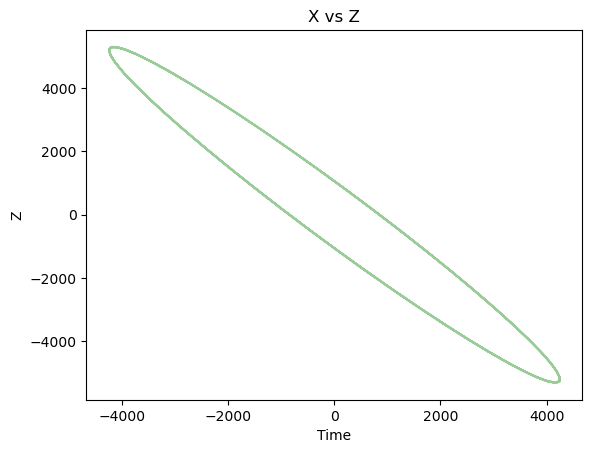

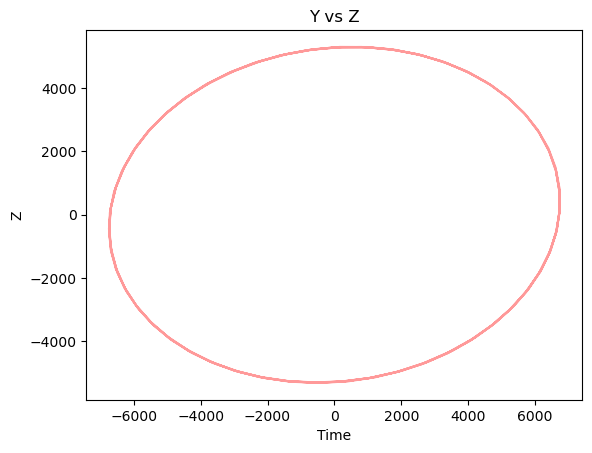

In [12]:
fig1 = plt.figure()
ax = plt.axes()
ax.set_xlabel('Time')
ax.set_ylabel('X')
plt.title('X vs Time')
ax.plot(test.t, test.y[0], color='blue', alpha=0.4)


fig2 = plt.figure()
ax = plt.axes()
ax.set_xlabel('Time')
ax.set_ylabel('Y')
plt.title('Y vs Time')
ax.plot(test.t, test.y[1],  color='green', alpha=0.4)


fig3 = plt.figure()
ax = plt.axes()
ax.set_xlabel('Time')
ax.set_ylabel('Z')
plt.title('Z vs Time')
ax.plot(test.t, test.y[2], color='red', alpha=0.4)

fig4 = plt.figure()
ax = plt.axes()
ax.set_xlabel('Time')
ax.set_ylabel('Z')
plt.title('X vs Y')
ax.plot(test.y[0], test.y[1], color='blue', alpha=0.4)

fig5 = plt.figure()
ax = plt.axes()
ax.set_xlabel('Time')
ax.set_ylabel('Z')
plt.title('X vs Z')
ax.plot(test.y[0], test.y[2], color='green', alpha=0.4)


fig6 = plt.figure()
ax = plt.axes()
ax.set_xlabel('Time')
ax.set_ylabel('Z')
plt.title('Y vs Z')
ax.plot(test.y[1], test.y[2], color='red', alpha=0.4)


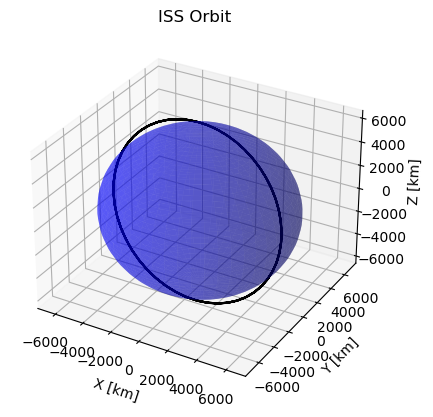

In [13]:
# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6378.14  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)

# Plotting Earth and Orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.4)

#you need to redefine x_sat,y_sat, and z_sat to use your x,y,z solution array names
ax.plot3D(test.y[0], test.y[1], test.y[2], 'black')

#ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
plt.title('ISS Orbit')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]');